In [21]:
import os
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../data"

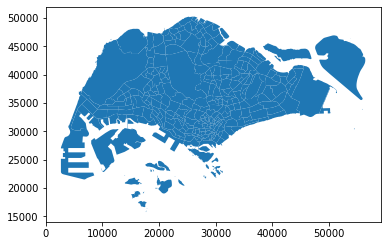

In [5]:
gdf_subzone = gpd.read_file(os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp"))


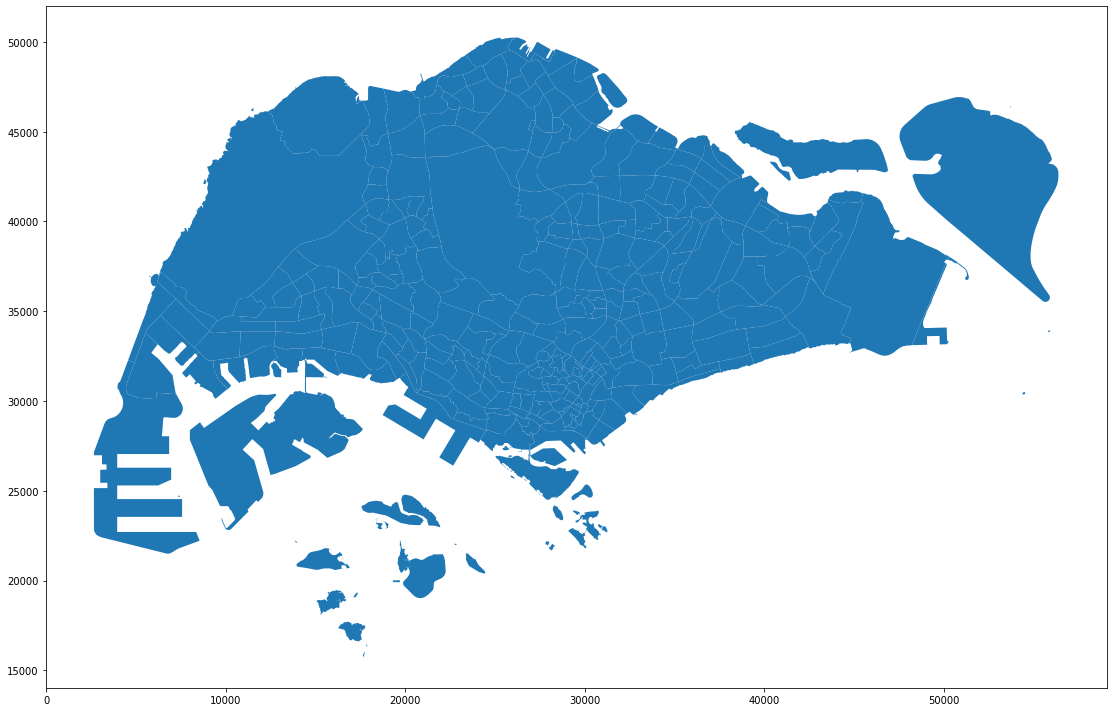

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_subzone.plot(ax=ax)
plt.tight_layout()

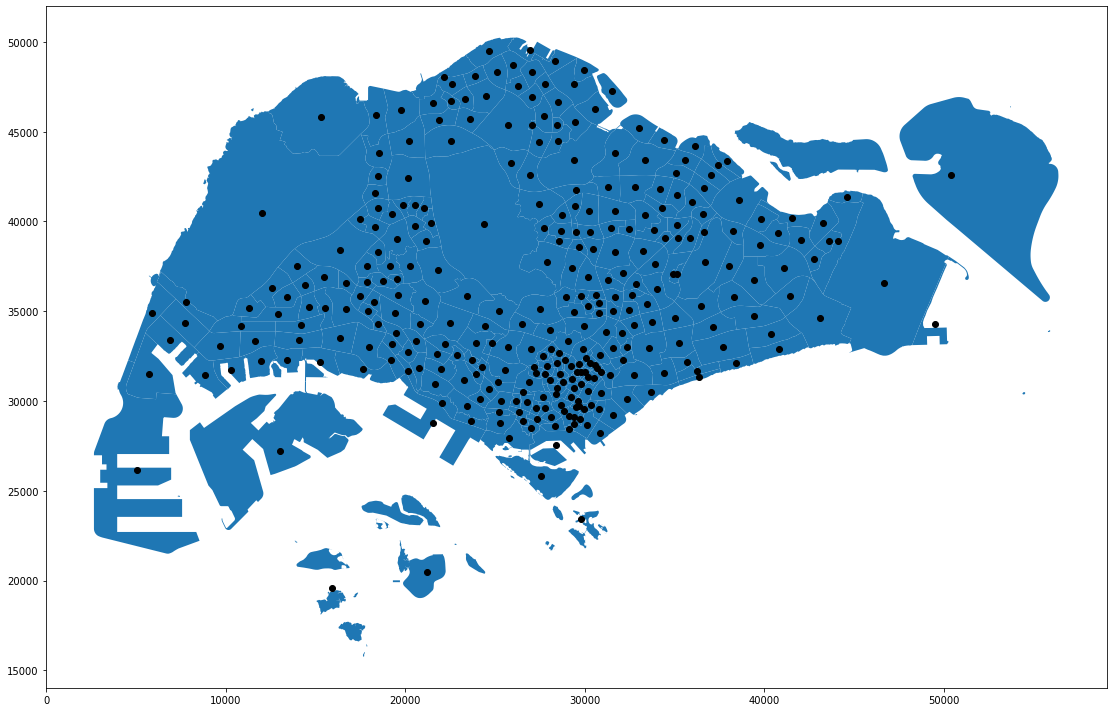

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_subzone.plot(ax=ax)
gdf_subzone.centroid.plot(ax=ax, c="k")
plt.tight_layout()

In [14]:
points = gdf_subzone.centroid
points.head()

0    POINT (31595.836 29220.187)
1    POINT (28679.063 29782.052)
2    POINT (29654.959 29974.655)
3    POINT (26782.826 29933.765)
4    POINT (26201.958 30005.704)
dtype: geometry

In [18]:
points_recs = []
for i in range(len(gdf_subzone)):
    this_row = gdf_subzone.iloc[i]
    this_pt = points.iloc[i]
    sz = this_row["SUBZONE_N"]
    points_recs.append({ "sub_zone": sz, "xx": this_pt.x, "yy": this_pt.y })
    #print(this_row, this_pt)
    #break
points_df = pd.DataFrame.from_dict(points_recs)
points_df.head()

,sub_zone,xx,yy
0,MARINA SOUTH,31595.835746,29220.187377
1,PEARL'S HILL,28679.063482,29782.051966
2,BOAT QUAY,29654.959448,29974.655356
3,HENDERSON HILL,26782.826115,29933.765194
4,REDHILL,26201.958019,30005.703511


In [19]:
points_df.to_csv(os.path.join(data_dir, "subzone_centroid.csv"), index_label="ind")

In [20]:
points_dic = {}
for i in range(len(gdf_subzone)):
    this_row = gdf_subzone.iloc[i]
    this_pt = points.iloc[i]
    sz = this_row["SUBZONE_N"]
    points_dic[sz] = (this_pt.x, this_pt.y)
len(points_dic)

323

In [23]:
with open(os.path.join(data_dir, 'subzone_centroid_pos.json'), 'w') as fwrite:
    json.dump(points_dic, fwrite)

In [26]:
with open(os.path.join(data_dir, 'subzone_centroid_pos.json'), 'r') as fread:
    temp_dic = json.load(fread)
temp_dic

{'MARINA SOUTH': [31595.83574613999, 29220.18737674884],
 "PEARL'S HILL": [28679.063482188954, 29782.05196581279],
 'BOAT QUAY': [29654.959447992474, 29974.655356499807],
 'HENDERSON HILL': [26782.826114537977, 29933.76519384831],
 'REDHILL': [26201.95801931446, 30005.703511426786],
 'ALEXANDRA HILL': [25358.82086871003, 29991.384227892642],
 'BUKIT HO SWEE': [27680.06279379669, 30230.86100326741],
 'CLARKE QUAY': [29253.20737914155, 30222.86451497017],
 'PASIR PANJANG 1': [22077.338362873998, 29893.781282844575],
 'QUEENSWAY': [24168.31066714539, 30104.176894295317],
 'KENT RIDGE': [23464.84096945936, 29725.370664883834],
 'ALEXANDRA NORTH': [26548.25074103508, 30519.39221732218],
 'MARINA EAST': [32344.048917584205, 30103.249579339245],
 'INSTITUTION HILL': [28465.399957863778, 30711.217954895546],
 'ROBERTSON QUAY': [28416.847705809705, 30409.360710004737],
 'JURONG ISLAND AND BUKOM': [13012.880555036538, 27225.867493559617],
 'SUDONG': [15931.758650202442, 19579.069041529252],
 'SE